In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")
from datetime import datetime
from datetime import timedelta
import math
import random 
import timeit
from dateutil import parser

In [66]:
brm_frame = pd.read_csv("resources/bremen.csv")
brm_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157576 entries, 0 to 157575
Data columns (total 9 columns):
day              157576 non-null object
time             157576 non-null object
b_number         157576 non-null int64
city             157576 non-null object
trip_duration    157576 non-null object
orig_lat         157576 non-null float64
orig_lng         157576 non-null float64
dest_lat         157576 non-null float64
dest_lng         157576 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 10.8+ MB


In [67]:
frb_frame = pd.read_csv("resources/freiburg.csv")

In [92]:
brm_frame["minutes"]=brm_frame["trip_duration"].map(lambda x:int(x[10:12])+int(x[7:9])*60)
brm_frame["revenue"]=(brm_frame["minutes"]/30).apply(np.ceil)
frb_frame["minutes"]=frb_frame["trip_duration"].map(lambda x:int(x[10:12])+int(x[7:9])*60)
frb_frame["revenue"]=(frb_frame["minutes"]/30).apply(np.ceil)

In [93]:
brm_frame
frb_frame

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,minutes,revenue
0,2019-05-06,14:22:00,32560,freiburg,0 days 00:07:00.000000000,47.993178,7.795708,47.994027,7.796084,7,1.0
1,2019-05-07,10:42:00,32560,freiburg,0 days 00:07:00.000000000,47.994191,7.796853,47.991960,7.797405,7,1.0
2,2019-05-07,11:02:00,32560,freiburg,0 days 00:09:00.000000000,47.992044,7.797352,47.992000,7.797478,9,1.0
3,2019-05-07,12:48:00,32560,freiburg,0 days 00:23:00.000000000,47.992107,7.797499,47.994271,7.796668,23,1.0
4,2019-05-08,09:00:00,32560,freiburg,0 days 00:03:00.000000000,47.994178,7.796721,47.992307,7.796708,3,1.0
5,2019-05-08,11:33:00,32560,freiburg,0 days 00:04:00.000000000,47.992307,7.796708,47.993244,7.796573,4,1.0
6,2019-05-08,11:38:00,32560,freiburg,0 days 00:03:00.000000000,47.993244,7.796575,47.992960,7.794476,3,1.0
7,2019-05-08,11:42:00,32560,freiburg,0 days 00:08:00.000000000,47.992960,7.794476,47.994178,7.796721,8,1.0
8,2019-05-08,14:03:00,32560,freiburg,0 days 00:03:00.000000000,47.994156,7.797711,47.994178,7.796721,3,1.0
9,2019-05-09,08:49:00,32560,freiburg,0 days 00:04:00.000000000,47.994178,7.796721,47.992307,7.796708,4,1.0


In [94]:
brm_frame_revenue_daily=brm_frame.groupby(["day"]).agg({"revenue":"sum"})
frb_frame_revenue_daily=frb_frame.groupby(["day"]).agg({"revenue":"sum"})

In [95]:
brm_frame_revenue_hourly=brm_frame.groupby(["day","time"]).agg({"revenue":"sum"})
frb_frame_revenue_hourly=frb_frame.groupby(["day","time"]).agg({"revenue":"sum"})

In [96]:
print brm_frame_revenue_daily
print frb_frame_revenue_daily

            revenue
day                
2019-01-20    132.0
2019-01-21    184.0
2019-01-22    189.0
2019-01-23    169.0
2019-01-24    182.0
2019-01-25    192.0
2019-01-26    110.0
2019-01-27     82.0
2019-01-28    180.0
2019-01-29    217.0
2019-01-30    201.0
2019-01-31    234.0
2019-02-01    226.0
2019-02-02    152.0
2019-02-03    169.0
2019-02-04    182.0
2019-02-05    272.0
2019-02-06    226.0
2019-02-07    281.0
2019-02-08    361.0
2019-02-09    204.0
2019-02-10    108.0
2019-02-11    254.0
2019-02-12    271.0
2019-02-13    281.0
2019-02-14    330.0
2019-02-15    350.0
2019-02-16    289.0
2019-02-17    301.0
2019-02-18    309.0
...             ...
2019-12-22    304.0
2019-12-23    395.0
2019-12-24    177.0
2019-12-25    181.0
2019-12-26    253.0
2019-12-27    387.0
2019-12-28    342.0
2019-12-29    269.0
2019-12-30    377.0
2019-12-31    374.0
2020-01-01    309.0
2020-01-02    285.0
2020-01-03    201.0
2020-01-04    249.0
2020-01-05    272.0
2020-01-06    361.0
2020-01-07    491.0


In [97]:
print brm_frame_revenue_hourly
print frb_frame_revenue_daily

                     revenue
day        time             
2019-01-20 00:13:00      1.0
           00:40:00      1.0
           00:47:00      1.0
           01:07:00      1.0
           01:36:00      1.0
           01:58:00      1.0
           02:03:00      1.0
           02:44:00      1.0
           02:49:00      2.0
           02:52:00      1.0
           03:00:00      1.0
           03:58:00      1.0
           05:08:00      2.0
           05:25:00      1.0
           06:07:00      1.0
           06:34:00      1.0
           07:26:00      1.0
           08:30:00      3.0
           08:49:00      1.0
           09:13:00      1.0
           09:37:00      1.0
           09:48:00      1.0
           10:11:00      1.0
           10:17:00      1.0
           10:19:00      2.0
           10:24:00      1.0
           10:29:00      1.0
           10:48:00      1.0
           10:55:00      1.0
           11:05:00      1.0
...                      ...
2020-01-20 20:31:00      1.0
           20:

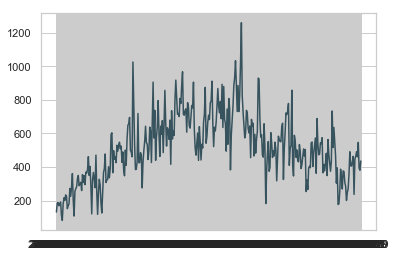

In [98]:
plt.plot(brm_frame_revenue_daily)
plt.show()

In [ ]:
plt.plot(frb_frame_revenue_daily)
plt.show()